<a href="https://colab.research.google.com/github/TGJAISAI/Boston-House-Price-Prediction-Project/blob/main/Boston_house_prices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio 
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
df=-pd.read_csv("https://raw.githubusercontent.com/ayush714/ML001-Project-Sources-Code-and-Learning-Materials/main/Notebooks%20Used%20in%20the%20course/Boston%20House%20Price%20Prediction%20Project/out/out.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,-0.00632,-18.0,-2.31,-0.0,-0.538,-6.575,-65.2,-4.0900,-1.0,-296.0,-15.3,-396.90,-4.98,-24.0
1,-0.02731,-0.0,-7.07,-0.0,-0.469,-6.421,-78.9,-4.9671,-2.0,-242.0,-17.8,-396.90,-9.14,-21.6
2,-0.02729,-0.0,-7.07,-0.0,-0.469,-7.185,-61.1,-4.9671,-2.0,-242.0,-17.8,-392.83,-4.03,-34.7
3,-0.03237,-0.0,-2.18,-0.0,-0.458,-6.998,-45.8,-6.0622,-3.0,-222.0,-18.7,-394.63,-2.94,-33.4
4,-0.06905,-0.0,-2.18,-0.0,-0.458,-7.147,-54.2,-6.0622,-3.0,-222.0,-18.7,-396.90,-5.33,-36.2


In [59]:
df1 = df.abs()

In [60]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
from sklearn.datasets import load_boston
load_boston =load_boston()
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [62]:
df1.shape

(506, 14)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [64]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



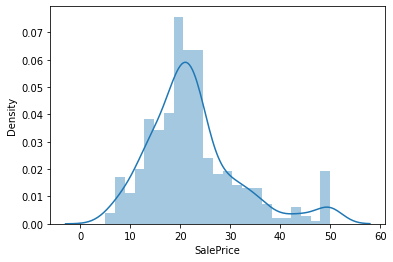

In [65]:
sns.distplot(df1["SalePrice"])

In [66]:
print("skewness: %f" % df1["SalePrice"].skew())

skewness: 1.108098


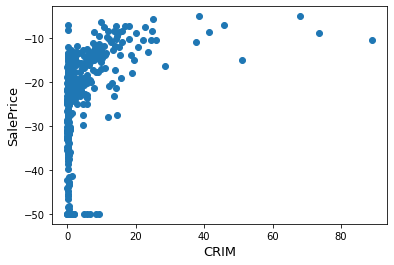

In [67]:
fig, ax = plt.subplots()
ax.scatter(x = df1['CRIM'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

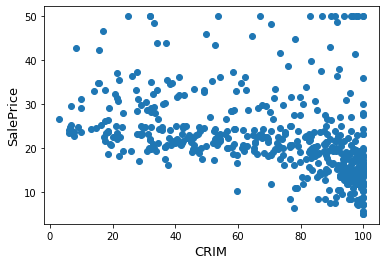

In [69]:
fig, ax = plt.subplots()
ax.scatter(x = df1['AGE'], y = df1['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()


 mu = 22.53 and sigma = 9.19



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



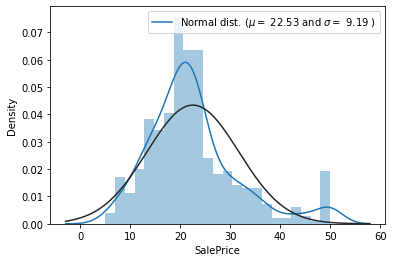

In [72]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(df1['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(df1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



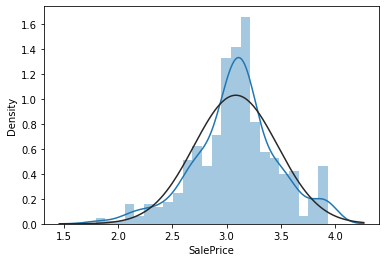

In [76]:
df1["SalePrice"] = np.log1p(df1["SalePrice"])

sns.distplot(df1['SalePrice'] , fit=norm)

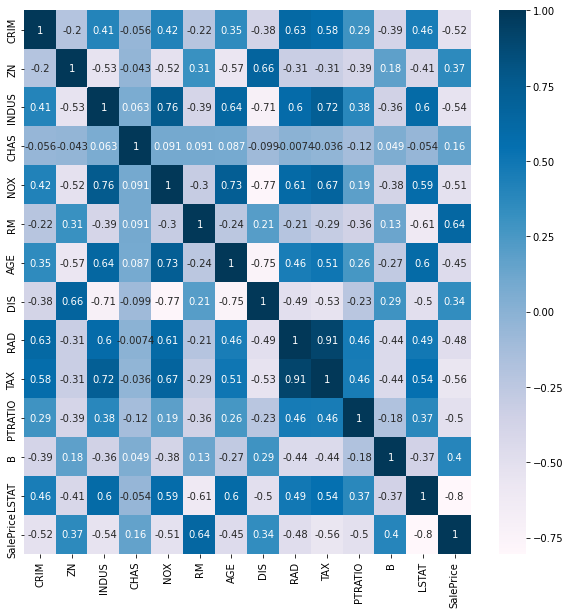

In [78]:
plt.figure(figsize=(10,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [84]:
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target<0.2] #to find the values which are low correlated 

name =[index for index, value in relevant_features.iteritems()]

#name.remove("SalePrice")
print(name)
print(len(name))

['CHAS']
1


In [94]:
df1.drop('CHAS',inplace= True,axis=1)

In [96]:
from sklearn.model_selection import train_test_split

x = df1.drop("SalePrice",axis=1)
y = df1["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train) 

LinearRegression()

In [100]:
pre= lr.predict(x_test)

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", pre[0])

Actual value of the house:-  3.2188758248682006
Model Predicted Value:-  3.374248487683638


In [108]:
lr.score(x_test,y_test)

0.7393769626656386

In [104]:
from sklearn.metrics import mean_squared_error

mse= mean_squared_error(y_test,pre)
print('MSE:',mse)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

MSE: 0.03614777071417619
RMSE : 0.19012567084477622
